(1427, 2100, 3)


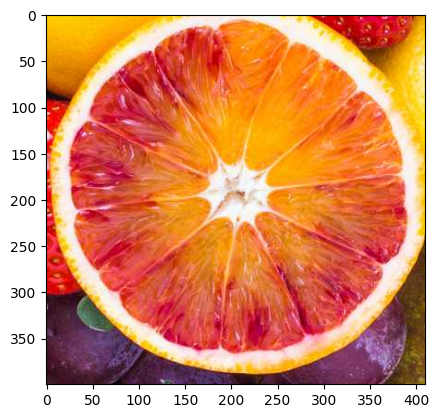

In [1]:
# 1.1 Chọn đối tượng trong ảnh
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('fruit.jpg')
bmg = data[800:1200, 570:980]
print(data.shape)

iio.imsave('orange.jpg', bmg)
plt.imshow(bmg)
plt.show()

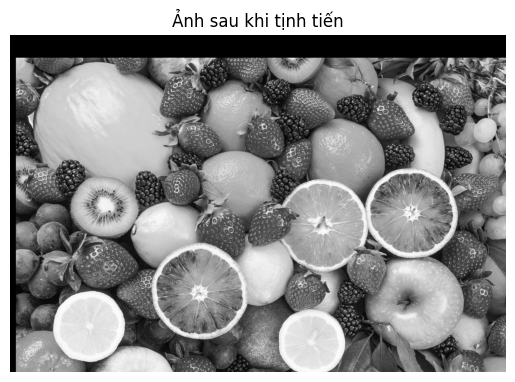

In [16]:
# 1.2 Tịnh tiến đơn
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import scipy.ndimage as nd

# Đọc ảnh màu
try:
    img = iio.imread('fruit.jpg')
except FileNotFoundError:
    print("Không tìm thấy file 'fruit.jpg'. Hãy chắc chắn rằng ảnh nằm trong cùng thư mục với file code.")
    exit()

# Chuyển ảnh màu sang ảnh xám nếu cần
if len(img.shape) == 3:  # Ảnh có 3 kênh màu (RGB)
    data = 0.2989 * img[:, :, 0] + 0.5870 * img[:, :, 1] + 0.1140 * img[:, :, 2]
else:
    data = img  # Ảnh đã là ảnh xám

# Tịnh tiến ảnh: 100 pixel xuống, 25 pixel sang phải
bdata = nd.shift(data, shift=(100, 25), order=0)

# Hiển thị ảnh sau khi tịnh tiến
plt.imshow(bdata, cmap='gray')
plt.title('Ảnh sau khi tịnh tiến')
plt.axis('off')
plt.show()




(1427, 2100, 3)
(2854, 4200, 6)
(2854, 4200, 3)
(714, 1890, 3)


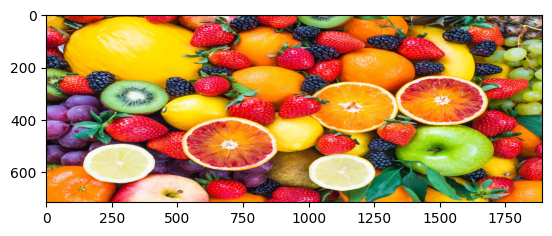

In [3]:
# 1.3 Thay đổi kích thước ảnh
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import scipy.ndimage as nd

data = iio.imread('fruit.jpg')
print(data.shape)
bdata = nd.zoom(data, 2)
print(bdata.shape)
data2 = nd.zoom(data, (2, 2, 1))
print(data2.shape)
data3 = nd.zoom(data, (0.5, 0.9, 1))
print(data3.shape)

plt.imshow(data3)
plt.show()

(1427, 2100, 3)


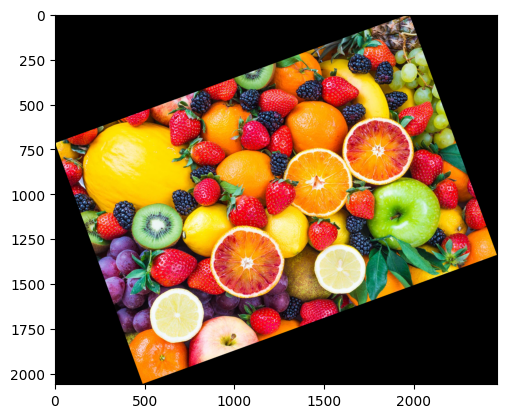

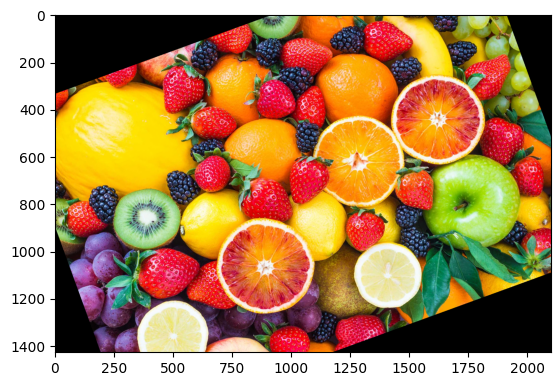

In [8]:
# 1.4 Xoay ảnh

import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import scipy.ndimage as nd

data = iio.imread('fruit.jpg')
print(data.shape)

d1 = nd.rotate(data, 20)
plt.imshow(d1)
plt.show()

d2 = nd.rotate(data, 20, reshape=False)
plt.imshow(d2)
plt.show()

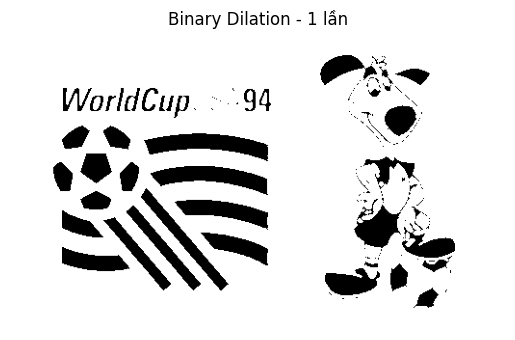

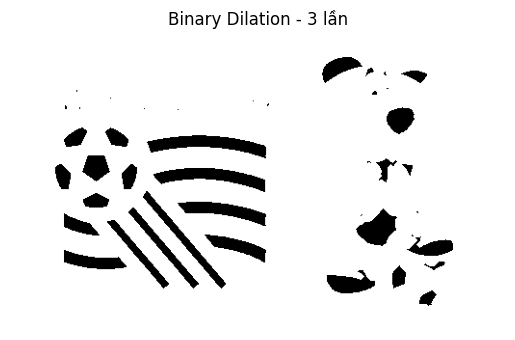

In [12]:
# 1.5 Dilation và Erosion

import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
import scipy.ndimage as nd

# Đọc ảnh màu (RGB)
img = iio.imread('world_cup.jpg')

# Chuyển ảnh màu sang ảnh xám theo công thức NTSC
# Y = 0.2989 * R + 0.5870 * G + 0.1140 * B
if len(img.shape) == 3:  # kiểm tra nếu là ảnh màu
    gray = 0.2989 * img[:, :, 0] + 0.5870 * img[:, :, 1] + 0.1140 * img[:, :, 2]
else:
    gray = img  # đã là ảnh xám

# Chuẩn hóa về [0,1] nếu cần
if gray.max() > 1.0:
    gray = gray / 255.0

# Chuyển sang ảnh nhị phân bằng ngưỡng
binary = gray > 0.5

# Dilation
d1 = nd.binary_dilation(binary)
plt.imshow(d1, cmap='gray')
plt.title('Binary Dilation - 1 lần')
plt.axis('off')
plt.show()

d2 = nd.binary_dilation(binary, iterations=3)
plt.imshow(d2, cmap='gray')
plt.title('Binary Dilation - 3 lần')
plt.axis('off')
plt.show()

(309, 515)


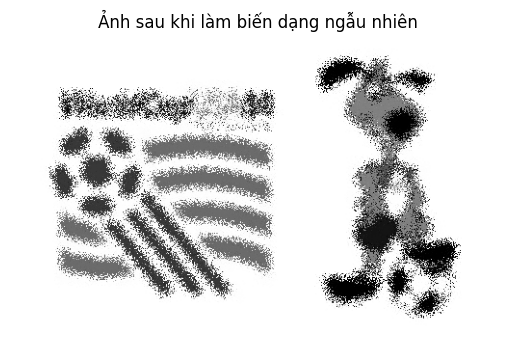

In [15]:
# 1.6 Coordinate Mapping

import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import scipy.ndimage as nd

# Đọc ảnh màu
img = iio.imread('world_cup.jpg')

# Chuyển sang ảnh xám nếu ảnh có 3 kênh màu
if len(img.shape) == 3:
    data = 0.2989 * img[:, :, 0] + 0.5870 * img[:, :, 1] + 0.1140 * img[:, :, 2]
else:
    data = img

print(data.shape)
V, H = data.shape

# Lấy chỉ số pixel
M = np.indices((V, H))

# Tạo nhiễu ngẫu nhiên trong khoảng [-d, d]
d = 5
q = 2 * d * np.random.rand(*M.shape) - d  # dùng rand thay vì ranf

# Áp dụng biến đổi map coordinates
mp = (M + q).astype(int)

# Giới hạn chỉ số không vượt quá biên ảnh
mp[0] = np.clip(mp[0], 0, V - 1)
mp[1] = np.clip(mp[1], 0, H - 1)

# Lấy giá trị tại các vị trí mới
d1 = data[mp[0], mp[1]]

# Hiển thị ảnh kết quả
plt.imshow(d1, cmap='gray')
plt.title('Ảnh sau khi làm biến dạng ngẫu nhiên')
plt.axis('off')
plt.show()


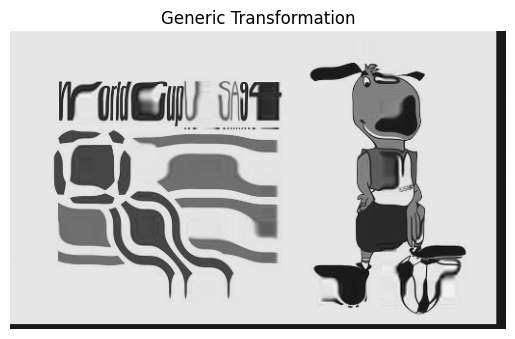

In [14]:
# 1.7 Biến đổi chung (Generic Transformation)

import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import scipy.ndimage as nd

# Đọc ảnh màu
img = iio.imread('world_cup.jpg')

# Chuyển ảnh màu sang xám thủ công (nếu cần)
if len(img.shape) == 3:
    # Công thức chuyển sang grayscale (chuẩn NTSC)
    data = 0.2989 * img[:, :, 0] + 0.5870 * img[:, :, 1] + 0.1140 * img[:, :, 2]
else:
    data = img

# Định nghĩa hàm biến đổi tọa độ
def GeoFun(outcoord):
    a = 10 * np.cos(outcoord[0] / 10.0) + outcoord[0]
    b = 10 * np.cos(outcoord[1] / 10.0) + outcoord[1]
    return a, b

# Áp dụng biến đổi hình học
d1 = nd.geometric_transform(data, GeoFun)

# Hiển thị kết quả
plt.imshow(d1, cmap='gray')
plt.title('Generic Transformation')
plt.axis('off')
plt.show()
